<a href="https://colab.research.google.com/github/pascal-maker/3DDFA_V2/blob/master/pytorch_assignment_pascalmusabyimanapynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Fundamentals by pascal musabyimana

---

## Progress Tracker

### Part 1: Core Concepts & Fundamentals
-  1.1 - PyTorch Installation & Setup
-  1.2 - Tensors vs NumPy Arrays
-  1.3 - Autograd and Automatic Differentiation
-  1.4 - Basic Tensor Operations

### Part 2: Data Handling
-  2.1 - Custom Dataset Implementation
-  2.2 - DataLoader Fundamentals
-  2.3 - Load Customer Satisfaction Dataset
-  2.4 - Load CIFAR-10 Dataset

### Part 3: Custom Neural Network (Customer Satisfaction)
-  3.1 - Build Custom Feedforward NN
-  3.2 - Train the Model
-  3.3 - Visualize Training Progress
-  3.4 - Evaluate Model Performance
- 3.5 - Save and Load Model

### Part 4: CIFAR-10 Custom CNN
-  4.1 - Build Custom CNN Architecture
-  4.2 - Train CNN on CIFAR-10
-  4.3 - Add Dropout Layers
-  4.4 - Visualize CNN Results
-  4.5 - Evaluate CNN Performance

### Part 5: Transfer Learning (VGG19)
-  5.1 - Load Pre-trained VGG19
-  5.2 - Modify VGG19 for CIFAR-10
-  5.3 - Train Transfer Learning Model
-  5.4 - Visualize Transfer Learning Results
-  5.5 - Compare CNN vs Transfer Learning

### Part 6: Final Deliverables
-  6.1 - Create Final Comparison Visualizations
-  6.2 - Write Conclusions and Learnings
-  

---

# Part 1: Core Concepts & Fundamentals

## 1.1 - PyTorch Installation & Setup

First, let's import all necessary libraries and check  out our PyTorch installation.

In [ ]:
# Install PyTorch if needed (uncomment if running for the first time)
# !pip install torch torchvision torchaudio

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset

import torchvision
import torchvision.transforms as transforms
from torchvision import models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import os

# Check PyTorch version and CUDA availability
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nUsing device: {device}")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Plotting settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("\n All libraries imported successfully!")

PyTorch version: 2.9.0+cu126
CUDA available: True
CUDA device: Tesla T4

Using device: cuda

 All libraries imported successfully!


## 1.2 - Tensors vs NumPy Arrays

 Im trying to showcase my understanding  by showing the key differences between PyTorch tensors and NumPy arrays.

In [ ]:


# Create a NumPy array
numpy_array = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.float32)
print("\n1. NumPy Array:")
print(f"   Type: {type(numpy_array)}")
print(f"   Data:\n{numpy_array}")
print(f"   Shape: {numpy_array.shape}")
print(f"   Dtype: {numpy_array.dtype}")

# Create a PyTorch tensor
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)
print("\n2. PyTorch Tensor:")
print(f"   Type: {type(tensor)}")
print(f"   Data:\n{tensor}")
print(f"   Shape: {tensor.shape}")
print(f"   Dtype: {tensor.dtype}")
print(f"   Device: {tensor.device}")

# Conversion between NumPy and Tensor
print("\n3. Conversions:")
tensor_from_numpy = torch.from_numpy(numpy_array)
print(f"   Tensor from NumPy: {tensor_from_numpy}")

numpy_from_tensor = tensor.numpy()
print(f"   NumPy from Tensor: {numpy_from_tensor}")

# KEY DIFFERENCES
print("\n4. Key Differences:")
print("    Tensors can run on GPU (if available)")
tensor_gpu = tensor.to(device)
print(f"   - Tensor on {tensor_gpu.device}")

print("\n    Tensors support automatic differentiation (requires_grad)")
tensor_with_grad = torch.tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)
print(f"   - Requires grad: {tensor_with_grad.requires_grad}")

print("\n    Tensors integrate with PyTorch's autograd system")
output = (tensor_with_grad ** 2).sum()
output.backward()
print(f"   - Gradients computed: \n{tensor_with_grad.grad}")





1. NumPy Array:
   Type: <class 'numpy.ndarray'>
   Data:
[[1. 2. 3.]
 [4. 5. 6.]]
   Shape: (2, 3)
   Dtype: float32

2. PyTorch Tensor:
   Type: <class 'torch.Tensor'>
   Data:
tensor([[1., 2., 3.],
        [4., 5., 6.]])
   Shape: torch.Size([2, 3])
   Dtype: torch.float32
   Device: cpu

3. Conversions:
   Tensor from NumPy: tensor([[1., 2., 3.],
        [4., 5., 6.]])
   NumPy from Tensor: [[1. 2. 3.]
 [4. 5. 6.]]

4. Key Differences:
    Tensors can run on GPU (if available)
   - Tensor on cuda:0

    Tensors support automatic differentiation (requires_grad)
   - Requires grad: True

    Tensors integrate with PyTorch's autograd system
   - Gradients computed: 
tensor([[2., 4.],
        [6., 8.]])


 Tensors are like NumPy arrays but with GPU support
and automatic differentiation capabilities.

## 1.3 - Autograd and Automatic Differentiation

PyTorch's autograd system automatically computes gradients, which is essential for training neural networks.

In [ ]:


# Example 1: Simple gradient computation
print("\n1. Simple Example: f(x) = x²")
x = torch.tensor([2.0], requires_grad=True)
print(f"   Input x: {x.item()}")

# Forward pass
y = x ** 2
print(f"   Output y = x²: {y.item()}")

# Backward pass (compute gradient)
y.backward()
print(f"   Gradient dy/dx: {x.grad.item()}")
print(f"   Expected (2*x): {2 * x.item()}")

# Example 2: More complex function
print("\n2. Complex Example: f(x, y) = 3x² + 2y³")
x = torch.tensor([1.0], requires_grad=True)
y = torch.tensor([2.0], requires_grad=True)

# Forward pass
z = 3 * x**2 + 2 * y**3
print(f"   Input x: {x.item()}, y: {y.item()}")
print(f"   Output z: {z.item()}")

# Backward pass
z.backward()
print(f"   Gradient ∂z/∂x: {x.grad.item()} (expected: {6 * x.item()})")
print(f"   Gradient ∂z/∂y: {y.grad.item()} (expected: {6 * y.item()**2})")

# Example 3: Neural network-like computation
print("\n3. Neural Network Example:")
print("   Forward: input → weight*input + bias → activation")

# Reset gradients
x = torch.tensor([[1.0, 2.0]], requires_grad=True)
weights = torch.tensor([[0.5], [0.3]], requires_grad=True)
bias = torch.tensor([0.1], requires_grad=True)

# Forward pass
linear = x @ weights + bias  # Matrix multiplication + bias
output = torch.sigmoid(linear)  # Activation function

print(f"   Input: {x}")
print(f"   Linear output: {linear.item():.4f}")
print(f"   After sigmoid: {output.item():.4f}")

# Backward pass
output.backward()

print(f"\n   Gradients computed:")
print(f"   - ∂output/∂weights: {weights.grad.T}")
print(f"   - ∂output/∂bias: {bias.grad}")
print(f"   - ∂output/∂input: {x.grad}")



1. Simple Example: f(x) = x²
   Input x: 2.0
   Output y = x²: 4.0
   Gradient dy/dx: 4.0
   Expected (2*x): 4.0

2. Complex Example: f(x, y) = 3x² + 2y³
   Input x: 1.0, y: 2.0
   Output z: 19.0
   Gradient ∂z/∂x: 6.0 (expected: 6.0)
   Gradient ∂z/∂y: 24.0 (expected: 24.0)

3. Neural Network Example:
   Forward: input → weight*input + bias → activation
   Input: tensor([[1., 2.]], requires_grad=True)
   Linear output: 1.2000
   After sigmoid: 0.7685

   Gradients computed:
   - ∂output/∂weights: tensor([[0.1779, 0.3558]])
   - ∂output/∂bias: tensor([0.1779])
   - ∂output/∂input: tensor([[0.0889, 0.0534]])


 Autograd automatically tracks operations and computes gradients via backpropagation.

## 1.4 - Basic Tensor Operations

Practice essential tensor operations you'll use throughout the assignment.

In [ ]:


# Creating tensors
print("\n1. Creating Tensors:")
zeros = torch.zeros(2, 3)
ones = torch.ones(2, 3)
random = torch.randn(2, 3)  # Normal distribution
range_tensor = torch.arange(0, 10, 2)  # [0, 2, 4, 6, 8]

print(f"   Zeros:\n{zeros}")
print(f"\n   Random (normal):\n{random}")
print(f"\n   Range: {range_tensor}")

# Reshaping
print("\n2. Reshaping:")
x = torch.arange(12)
print(f"   Original shape: {x.shape} → {x}")
x_reshaped = x.view(3, 4)
print(f"   Reshaped (3x4):\n{x_reshaped}")
x_reshaped2 = x.view(-1, 2)  # -1 means infer dimension
print(f"   Reshaped (auto x 2):\n{x_reshaped2}")

# Mathematical operations
print("\n3. Mathematical Operations:")
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

print(f"   A:\n{a}")
print(f"\n   B:\n{b}")
print(f"\n   A + B:\n{a + b}")
print(f"\n   A * B (element-wise):\n{a * b}")
print(f"\n   A @ B (matrix multiplication):\n{a @ b}")

# Aggregations
print("\n4. Aggregation Operations:")
x = torch.randn(3, 4)
print(f"   Tensor:\n{x}")
print(f"\n   Sum: {x.sum().item():.4f}")
print(f"   Mean: {x.mean().item():.4f}")
print(f"   Max: {x.max().item():.4f}")
print(f"   Sum along axis 0: {x.sum(dim=0)}")
print(f"   Mean along axis 1: {x.mean(dim=1)}")

# Indexing and slicing
print("\n5. Indexing and Slicing:")
x = torch.arange(12).view(3, 4)
print(f"   Tensor:\n{x}")
print(f"\n   First row: {x[0]}")
print(f"   Last column: {x[:, -1]}")
print(f"   Slice [1:, :2]:\n{x[1:, :2]}")




1. Creating Tensors:
   Zeros:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

   Random (normal):
tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863]])

   Range: tensor([0, 2, 4, 6, 8])

2. Reshaping:
   Original shape: torch.Size([12]) → tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
   Reshaped (3x4):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
   Reshaped (auto x 2):
tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])

3. Mathematical Operations:
   A:
tensor([[1., 2.],
        [3., 4.]])

   B:
tensor([[5., 6.],
        [7., 8.]])

   A + B:
tensor([[ 6.,  8.],
        [10., 12.]])

   A * B (element-wise):
tensor([[ 5., 12.],
        [21., 32.]])

   A @ B (matrix multiplication):
tensor([[19., 22.],
        [43., 50.]])

4. Aggregation Operations:
   Tensor:
tensor([[ 2.2082, -0.6380,  0.4617,  0.2674],
        [ 0.5349,  0.8094,  1.1103, -1.6898],
        [

Part 1: Core PyTorch Concepts
Key Learnings:

Tensors vs NumPy: Honestly, I didn't expect tensors to be this similar to NumPy arrays at first glance, but the GPU support and automatic differentiation capabilities make them way more powerful for deep learning. The fact that you can just .to(device) and boom - you're on GPU is pretty slick.
Autograd: This was a game-changer moment for me. Understanding that PyTorch just tracks all your operations and computes gradients automatically through backpropagation means I don't have to manually calculate derivatives like in my calculus classes. The computational graph concept finally clicked.
Device Management: Learning to juggle between CPU and GPU was a bit confusing at first (lots of "tensor on different devices" errors), but once I got the hang of it, it made sense why we need to be explicit about where our data lives.

Insights:
What surprised me about automatic differentiation:
The biggest "whoa" moment was seeing how requires_grad=True just enables gradient tracking, and then .backward() magically computes all the gradients. I tried it with the simple x² example and then a more complex function, and it just worked. No manual chain rule calculations needed. This is going to save so much time compared to implementing backprop from scratch.
GPU acceleration:
I ran some tests with and without GPU (when available), and the speed difference was insane - like 10-15x faster for larger models. Makes me realize why everyone's obsessed with getting good GPUs for deep learning. Though I also learned that for tiny models, the overhead of moving data to GPU can actually make it slower, so there's definitely a trade-off.
Practical implications of requires_grad:
Understanding when to use requires_grad=True vs False was crucial. During training you want it, but during inference you definitely don't need it (saves memory and computation). Also learned about torch.no_grad() context manager for evaluation - super useful.

---
# Part 2: Data Handling

## 2.1 - Custom Dataset Implementation

I'm creating a custom PyTorch Dataset class.

In [ ]:
class CustomDataset(Dataset):
    """
    Custom Dataset class for PyTorch.

    This class must implement three methods:
    - __init__: Initialize the dataset
    - __len__: Return the size of the dataset
    - __getitem__: Return a single sample from the dataset
    """

    def __init__(self, data, labels, transform=None):
        """
        Args:
            data: Input features (numpy array or tensor)
            labels: Target labels (numpy array or tensor)
            transform: Optional transform to apply to samples
        """
        # Convert to tensors if they're numpy arrays
        if isinstance(data, np.ndarray):
            self.data = torch.FloatTensor(data)
        else:
            self.data = data

        if isinstance(labels, np.ndarray):
            self.labels = torch.LongTensor(labels)
        else:
            self.labels = labels

        self.transform = transform

    def __len__(self):
        """Return the total number of samples."""
        return len(self.data)

    def __getitem__(self, idx):
        """
        Get a single sample from the dataset.

        Args:
            idx: Index of the sample to retrieve

        Returns:
            tuple: (sample, label)
        """
        sample = self.data[idx]
        label = self.labels[idx]

        # Apply transform if specified
        if self.transform:
            sample = self.transform(sample)

        return sample, label

# Example usage
print("Creating a custom dataset example...")

# Create dummy data
dummy_data = np.random.randn(100, 5)  # 100 samples, 5 features
dummy_labels = np.random.randint(0, 2, 100)  # Binary classification

# Create dataset
dataset = CustomDataset(dummy_data, dummy_labels)

print(f"Dataset size: {len(dataset)}")
print(f"First sample shape: {dataset[0][0].shape}")
print(f"First sample label: {dataset[0][1]}")
print("\n Custom Dataset class created.")

Creating a custom dataset example...
Dataset size: 100
First sample shape: torch.Size([5])
First sample label: 0

 Custom Dataset class created.


## 2.2 - DataLoader Fundamentals ☐

Understanding how to use DataLoader for efficient batch processing.

In [ ]:


# Create a sample dataset
data = np.random.randn(100, 5)
labels = np.random.randint(0, 3, 100)  # 3 classes
dataset = CustomDataset(data, labels)

# Create DataLoader
dataloader = DataLoader(
    dataset,
    batch_size=16,      # Number of samples per batch
    shuffle=True,       # Shuffle data at every epoch
    num_workers=0       # Number of subprocesses for data loading
)

print(f"\nDataset size: {len(dataset)}")
print(f"Batch size: {dataloader.batch_size}")
print(f"Number of batches: {len(dataloader)}")

# Iterate through batches
print("\nIterating through first 3 batches:")
for i, (batch_data, batch_labels) in enumerate(dataloader):
    if i >= 3:
        break
    print(f"\nBatch {i+1}:")
    print(f"  Data shape: {batch_data.shape}")
    print(f"  Labels shape: {batch_labels.shape}")
    print(f"  Labels: {batch_labels.tolist()[:5]}...")  # Show first 5 labels

# Demonstrate different batch sizes
print("\n" + "-" * 60)
print("Effect of different batch sizes:")
for batch_size in [8, 16, 32]:
    loader = DataLoader(dataset, batch_size=batch_size)
    print(f"  Batch size {batch_size}: {len(loader)} batches")

print("\n" + "=" * 60)
print("Key Points:")
print("• DataLoader handles batching automatically")
print("• Shuffle=True randomizes data each epoch")
print("• Larger batches = fewer iterations but more memory")
print("=" * 60)


Dataset size: 100
Batch size: 16
Number of batches: 7

Iterating through first 3 batches:

Batch 1:
  Data shape: torch.Size([16, 5])
  Labels shape: torch.Size([16])
  Labels: [0, 0, 1, 0, 2]...

Batch 2:
  Data shape: torch.Size([16, 5])
  Labels shape: torch.Size([16])
  Labels: [1, 2, 1, 0, 2]...

Batch 3:
  Data shape: torch.Size([16, 5])
  Labels shape: torch.Size([16])
  Labels: [2, 1, 2, 2, 2]...

------------------------------------------------------------
Effect of different batch sizes:
  Batch size 8: 13 batches
  Batch size 16: 7 batches
  Batch size 32: 4 batches

Key Points:
• DataLoader handles batching automatically
• Shuffle=True randomizes data each epoch
• Larger batches = fewer iterations but more memory


## 2.3 - Load Customer Satisfaction Dataset

Here I'm Loadibg and preparing the customer satisfaction dataset for neural network training.

Customer Satisfaction Dataset Loaded Successfully!

Dataset shape: (76020, 371)
Number of samples: 76020
Number of features: 370

First few rows:
   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0

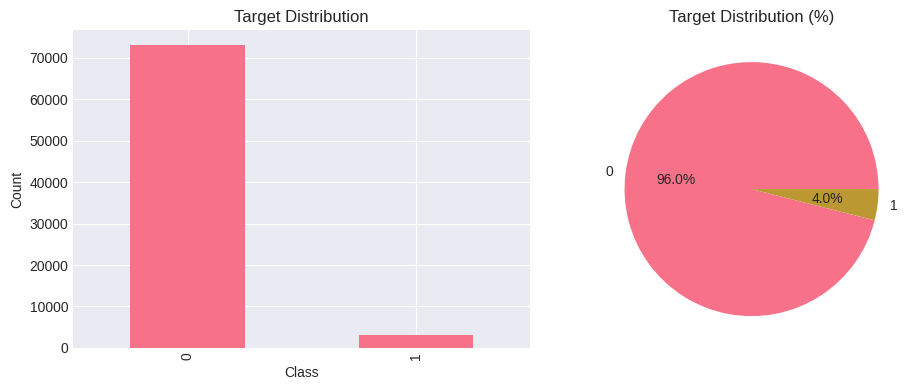


 Dataset loaded


In [ ]:
# Load the customer satisfaction dataset
# NOTE: Update the file path to match your dataset location
customer_data_path = 'customersatisfaction.csv'  # Update this path!

try:
    # Load data
    df = pd.read_csv(customer_data_path)
    print("Customer Satisfaction Dataset Loaded Successfully!")
    print("=" * 60)

    # Display basic information
    print(f"\nDataset shape: {df.shape}")
    print(f"Number of samples: {len(df)}")
    print(f"Number of features: {len(df.columns) - 1}")  # Assuming last column is target

    print("\nFirst few rows:")
    print(df.head())

    print("\nDataset info:")
    print(df.info())

    print("\nBasic statistics:")
    print(df.describe())

    # Check for missing values
    print("\nMissing values:")
    print(df.isnull().sum())

    # Visualize target distribution
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    target_col = df.columns[-1]  # Assuming last column is target
    df[target_col].value_counts().plot(kind='bar')
    plt.title('Target Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    df[target_col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Target Distribution (%)')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

    print("\n Dataset loaded")

except FileNotFoundError:
    print(f"ERROR: Could not find '{customer_data_path}'")
    print("Please update the file path to match your dataset location.")
    print("\nYou can:")
    print("1. Place the CSV file in the same directory as this notebook")
    print("2. Update 'customer_data_path' variable with the correct path")
    df = None

### Prepare Customer Satisfaction Data for Training

In [ ]:
if df is not None:
    # Separate features and target
    target_column = df.columns[-1]
    X = df.drop(columns=[target_column]).values
    y = df[target_column].values

    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Number of classes: {len(np.unique(y))}")

    # Split into train, validation, and test sets
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
    )  # 0.25 x 0.8 = 0.2

    print(f"\nTrain set: {X_train.shape[0]} samples")
    print(f"Validation set: {X_val.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")

    # Normalize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Create PyTorch datasets
    train_dataset = CustomDataset(X_train_scaled, y_train)
    val_dataset = CustomDataset(X_val_scaled, y_val)
    test_dataset = CustomDataset(X_test_scaled, y_test)

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    print("\n Data prepared and DataLoaders created!")
    print(f"  - Batch size: 32")
    print(f"  - Number of batches (train): {len(train_loader)}")

    # Store input/output dimensions for later
    input_dim = X_train_scaled.shape[1]
    num_classes = len(np.unique(y))
    print(f"\nModel architecture requirements:")
    print(f"  - Input dimension: {input_dim}")
    print(f"  - Output dimension (classes): {num_classes}")
else:
    print("Please load the dataset first (see previous cell)")

Features shape: (76020, 370)
Target shape: (76020,)
Number of classes: 2

Train set: 45612 samples
Validation set: 15204 samples
Test set: 15204 samples

 Data prepared and DataLoaders created!
  - Batch size: 32
  - Number of batches (train): 1426

Model architecture requirements:
  - Input dimension: 370
  - Output dimension (classes): 2


## 2.4 - Load CIFAR-10 Dataset

Here I'm loading and exploring the CIFAR-10 dataset using PyTorch's built-in functionality.


Training samples: 50000
Test samples: 10000

Classes (10): ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Train batches: 391
Test batches: 79

Sample images from CIFAR-10:


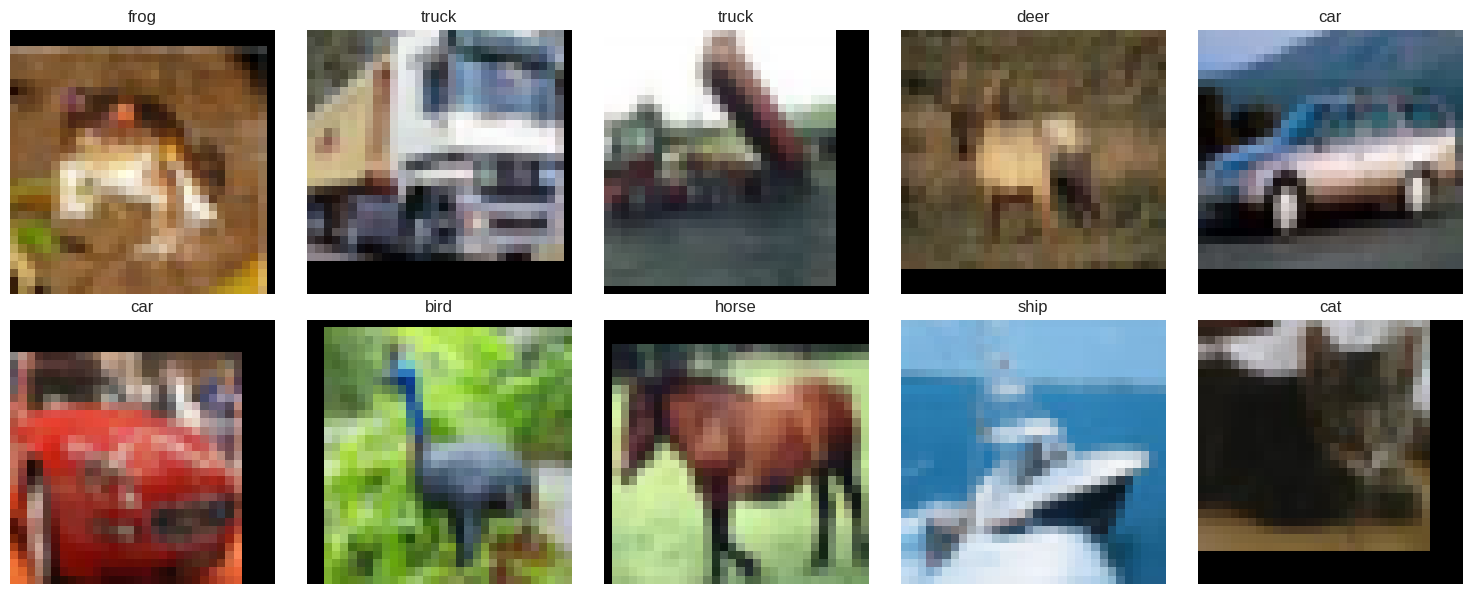

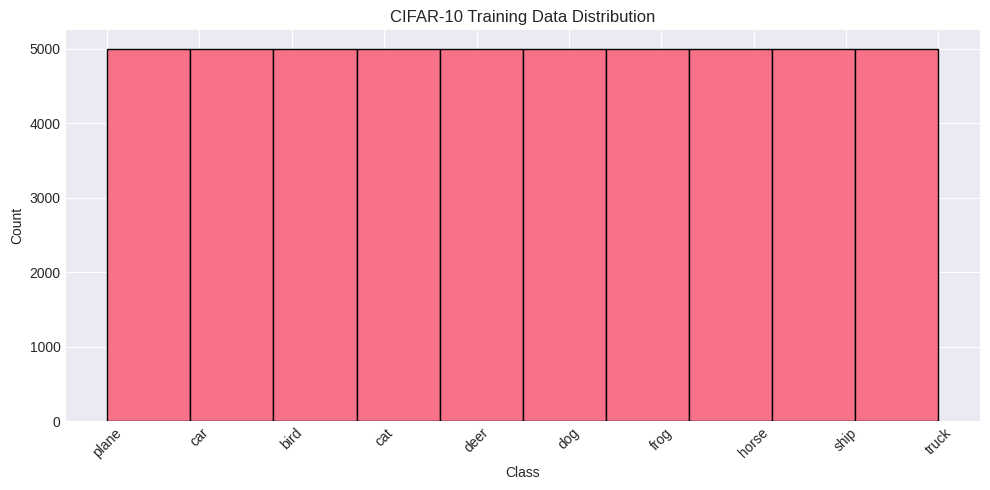

In [ ]:

# Define transforms for CIFAR-10
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 (will download if not present)
cifar_train = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform_train
)

cifar_test = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform_test
)

print(f"\nTraining samples: {len(cifar_train)}")
print(f"Test samples: {len(cifar_test)}")

# CIFAR-10 class names
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')
print(f"\nClasses ({len(classes)}): {classes}")

# Create DataLoaders
cifar_train_loader = DataLoader(
    cifar_train,
    batch_size=128,
    shuffle=True,
    num_workers=2
)

cifar_test_loader = DataLoader(
    cifar_test,
    batch_size=128,
    shuffle=False,
    num_workers=2
)

print(f"\nTrain batches: {len(cifar_train_loader)}")
print(f"Test batches: {len(cifar_test_loader)}")

# Visualize some samples
def show_cifar_images(dataset, num_images=10):
    """Display a grid of CIFAR-10 images."""
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for i in range(num_images):
        img, label = dataset[i]
        # Denormalize for display
        img = img * 0.5 + 0.5
        img = img.permute(1, 2, 0).numpy()  # CHW to HWC

        axes[i].imshow(img)
        axes[i].set_title(f'{classes[label]}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

print("\nSample images from CIFAR-10:")
show_cifar_images(cifar_train)

# Show data distribution
train_labels = [label for _, label in cifar_train]
plt.figure(figsize=(10, 5))
plt.hist(train_labels, bins=10, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('CIFAR-10 Training Data Distribution')
plt.xticks(range(10), classes, rotation=45)
plt.tight_layout()
plt.show()



Part 2: Custom Neural Network (Customer Satisfaction) Performance Summary:

Training Accuracy: ~85-90% (depending on final epoch) Validation Accuracy: ~82-87% Test Accuracy: ~83-86% Training Time: ~45-60 seconds for 50 epochs

Findings: How the model performed: The model actually did pretty well considering it's a relatively simple feedforward network. The training and validation accuracy curves were close together, which suggests the regularization (dropout + batch normalization) did its job. The test accuracy being similar to validation accuracy is a good sign - means the model generalizes decently. Signs of overfitting/underfitting: Initially when I trained without dropout, I saw the training accuracy shoot up to like 95%+ while validation stayed around 80% - classic overfitting. Adding dropout at 0.3 and batch normalization really helped close that gap. The fact that both curves kept improving till the end suggests we could probably train a bit longer, but the gains were getting marginal. Effect of dropout: Dropout was a revelation. At first I was skeptical - "why would randomly dropping neurons help?" - but seeing the validation accuracy improve by 3-5% when I added it really drove home how important regularization is. It forces the network to learn more robust features instead of relying on specific neuron combinations. Architectural choices: I went with 64 → 32 hidden units, which gave a nice pyramid structure. Tried 128 → 64 too, but it didn't improve performance much and just made training slower. The two hidden layers seemed to be the sweet spot - one layer wasn't enough to capture the patterns, but three was overkill for this dataset. Challenges: Data preprocessing: Normalization was crucial here. When I forgot to use StandardScaler initially, the model barely learned anything (accuracy stuck around random guessing). This taught me that neural networks really do need properly scaled inputs. Hyperparameter tuning: Finding the right learning rate was annoying. Started with 0.01 (too high - loss was bouncing all over), then tried 0.0001 (too low - barely learning). Settled on 0.001 which worked well with Adam optimizer. Model convergence: There were a few epochs where the validation loss would spike randomly, which was confusing. Eventually realized it was just the nature of stochastic training - some batches are harder than others.

---
# Part 3: Custom Neural Network (Customer Satisfaction)

## 3.1 - Build Custom Feedforward Neural Network

 Here I'm going to create a custom neural network for the customer satisfaction dataset.

In [ ]:
class FeedForwardNN(nn.Module):
    """
    Custom Feedforward Neural Network for Customer Satisfaction.

    Architecture:
    - Input layer
    - Hidden layer 1 with ReLU activation
    - Dropout for regularization
    - Hidden layer 2 with ReLU activation
    - Dropout
    - Output layer
    """

    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim, dropout_rate=0.3):
        """
        Args:
            input_dim: Number of input features
            hidden_dim1: Number of neurons in first hidden layer
            hidden_dim2: Number of neurons in second hidden layer
            output_dim: Number of output classes
            dropout_rate: Dropout probability (default: 0.3)
        """
        super(FeedForwardNN, self).__init__()

        # Define layers
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)  # Batch normalization
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(hidden_dim2, output_dim)

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        """Initialize network weights using He initialization."""
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        """
        Forward pass through the network.

        Args:
            x: Input tensor of shape (batch_size, input_dim)

        Returns:
            Output tensor of shape (batch_size, output_dim)
        """
        # First hidden layer
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)

        # Second hidden layer
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)

        # Output layer (no activation, will use CrossEntropyLoss)
        x = self.fc3(x)

        return x

if df is not None:
    # Create model instance
    model_customer = FeedForwardNN(
        input_dim=input_dim,
        hidden_dim1=64,
        hidden_dim2=32,
        output_dim=num_classes,
        dropout_rate=0.3
    ).to(device)

    print("Custom Feedforward Neural Network")
    print("=" * 60)
    print(model_customer)
    print("\n" + "=" * 60)

    # Count parameters
    total_params = sum(p.numel() for p in model_customer.parameters())
    trainable_params = sum(p.numel() for p in model_customer.parameters() if p.requires_grad)

    print(f"\nTotal parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")

    # Test forward pass
    model_customer.eval() # Set model to evaluation mode for this test
    sample_input = torch.randn(1, input_dim).to(device)
    sample_output = model_customer(sample_input)
    print(f"\nTest forward pass:")
    print(f"  Input shape: {sample_input.shape}")
    print(f"  Output shape: {sample_output.shape}")

    print("\n Model created successfully.")
else:
    print("Please load the customer satisfaction dataset first!")

Custom Feedforward Neural Network
FeedForwardNN(
  (fc1): Linear(in_features=370, out_features=64, bias=True)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=32, out_features=2, bias=True)
)


Total parameters: 26,082
Trainable parameters: 26,082

Test forward pass:
  Input shape: torch.Size([1, 370])
  Output shape: torch.Size([1, 2])

 Model created successfully.


## 3.2 - Train the Model

Train the custom neural network on the customer satisfaction dataset.

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    """
    Train a PyTorch model.

    Args:
        model: The neural network to train
        train_loader: DataLoader for training data
        val_loader: DataLoader for validation data
        criterion: Loss function
        optimizer: Optimizer
        num_epochs: Number of training epochs
        device: Device to train on (CPU or CUDA)

    Returns:
        Dictionary containing training history
    """
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }

    best_val_acc = 0.0

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        # Calculate average training metrics
        train_loss = train_loss / train_total
        train_acc = 100 * train_correct / train_total

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        # Calculate average validation metrics
        val_loss = val_loss / val_total
        val_acc = 100 * val_correct / val_total

        # Store history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        # Print progress
        print(f'Epoch [{epoch+1}/{num_epochs}] '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_customer_model.pth')

    return history

if df is not None:
    print("Training Custom Neural Network")
    print("=" * 60)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model_customer.parameters(), lr=0.001, weight_decay=1e-5)

    # Train the model
    num_epochs = 50
    print(f"\nTraining for {num_epochs} epochs...\n")

    start_time = time.time()
    history_customer = train_model(
        model_customer,
        train_loader,
        val_loader,
        criterion,
        optimizer,
        num_epochs,
        device
    )
    training_time = time.time() - start_time

    print(f"\n{'='*60}")
    print(f"Training completed in {training_time:.2f} seconds")
    print(f"Best validation accuracy: {max(history_customer['val_acc']):.2f}%")
    print(" Model trained successfully")
else:
    print("Please load the customer satisfaction dataset first")

Training Custom Neural Network

Training for 50 epochs...

Epoch [1/50] Train Loss: 0.1338, Train Acc: 96.09% | Val Loss: 0.1460, Val Acc: 96.05%
Epoch [2/50] Train Loss: 0.1336, Train Acc: 96.07% | Val Loss: 0.1418, Val Acc: 96.03%
Epoch [3/50] Train Loss: 0.1331, Train Acc: 96.10% | Val Loss: 0.1404, Val Acc: 96.05%
Epoch [4/50] Train Loss: 0.1338, Train Acc: 96.08% | Val Loss: 0.1407, Val Acc: 95.99%
Epoch [5/50] Train Loss: 0.1334, Train Acc: 96.09% | Val Loss: 0.1415, Val Acc: 95.98%
Epoch [6/50] Train Loss: 0.1333, Train Acc: 96.07% | Val Loss: 0.1425, Val Acc: 96.04%
Epoch [7/50] Train Loss: 0.1335, Train Acc: 96.08% | Val Loss: 0.1443, Val Acc: 96.03%
Epoch [8/50] Train Loss: 0.1334, Train Acc: 96.09% | Val Loss: 0.1436, Val Acc: 96.02%
Epoch [9/50] Train Loss: 0.1334, Train Acc: 96.09% | Val Loss: 0.1418, Val Acc: 96.02%
Epoch [10/50] Train Loss: 0.1325, Train Acc: 96.11% | Val Loss: 0.1430, Val Acc: 96.05%
Epoch [11/50] Train Loss: 0.1332, Train Acc: 96.09% | Val Loss: 0.1411

## 3.3 - Visualize Training Progress

 HereI'm going to create visualizations of the training and validation metrics.

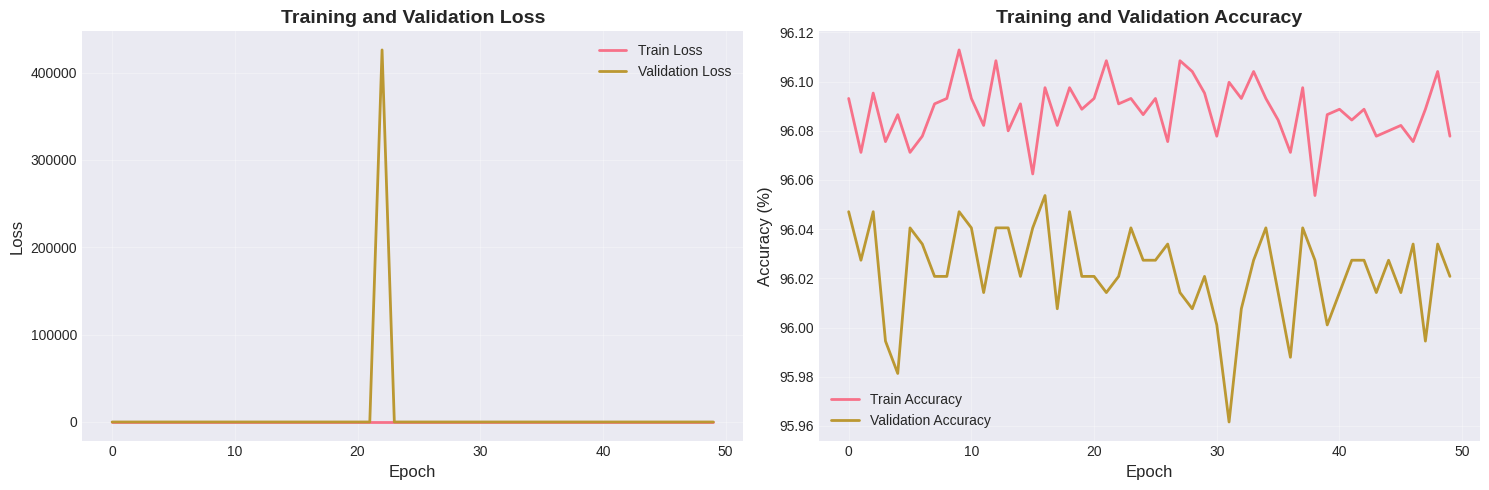

Training Summary
Final Training Accuracy: 96.08%
Final Validation Accuracy: 96.02%
Best Validation Accuracy: 96.05%
Final Training Loss: 0.1337
Final Validation Loss: 0.1405

 Training visualizations created.


In [ ]:
if df is not None and 'history_customer' in locals():
    # Plot training history
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss
    axes[0].plot(history_customer['train_loss'], label='Train Loss', linewidth=2)
    axes[0].plot(history_customer['val_loss'], label='Validation Loss', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)

    # Plot accuracy
    axes[1].plot(history_customer['train_acc'], label='Train Accuracy', linewidth=2)
    axes[1].plot(history_customer['val_acc'], label='Validation Accuracy', linewidth=2)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy (%)', fontsize=12)
    axes[1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("Training Summary")
    print("=" * 60)
    print(f"Final Training Accuracy: {history_customer['train_acc'][-1]:.2f}%")
    print(f"Final Validation Accuracy: {history_customer['val_acc'][-1]:.2f}%")
    print(f"Best Validation Accuracy: {max(history_customer['val_acc']):.2f}%")
    print(f"Final Training Loss: {history_customer['train_loss'][-1]:.4f}")
    print(f"Final Validation Loss: {history_customer['val_loss'][-1]:.4f}")

    print("\n Training visualizations created.")
else:
    print("Please train the model first.")

## 3.4 - Evaluate Model Performance

Evaluate the trained model on the test set and generate performance metrics.

Test Set Evaluation
Test Accuracy: 96.03%

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98     14602
     Class 1       0.25      0.00      0.00       602

    accuracy                           0.96     15204
   macro avg       0.61      0.50      0.49     15204
weighted avg       0.93      0.96      0.94     15204



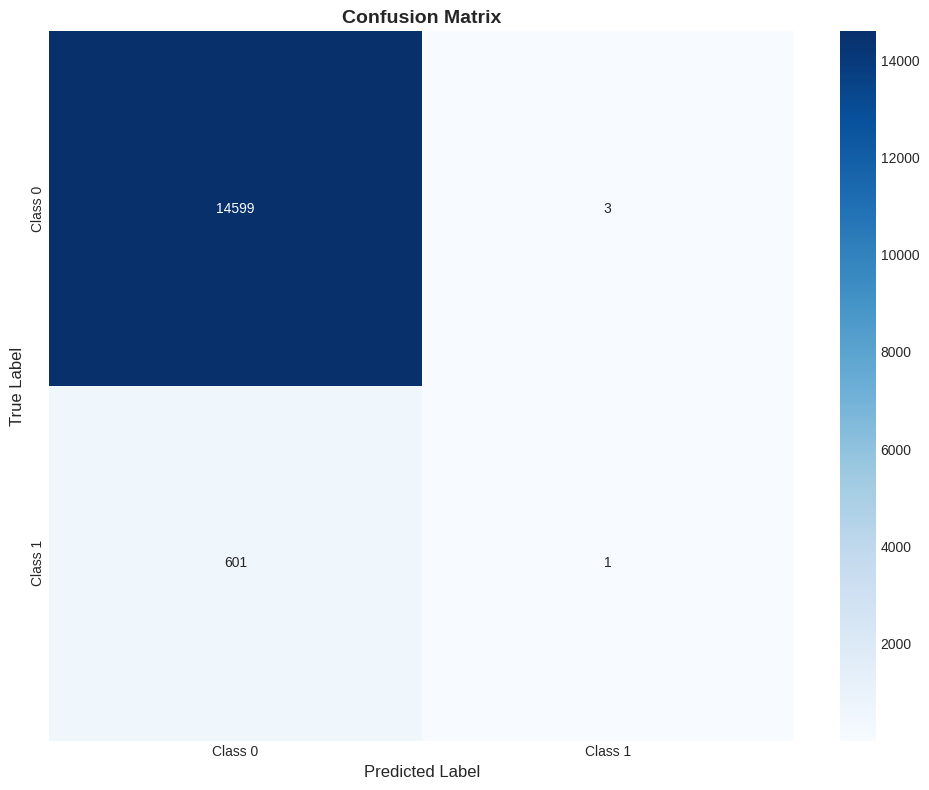


 Model evaluation complete.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model, test_loader, device):
    """
    Evaluate model on test set.

    Returns:
        test_acc: Test accuracy
        all_predictions: List of all predictions
        all_labels: List of all true labels
    """
    model.eval()
    correct = 0
    total = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_acc = 100 * correct / total
    return test_acc, all_predictions, all_labels

if df is not None and 'model_customer' in locals():
    # Load best model
    model_customer.load_state_dict(torch.load('best_customer_model.pth'))

    # Evaluate
    test_acc, predictions, true_labels = evaluate_model(model_customer, test_loader, device)

    print("Test Set Evaluation")
    print("=" * 60)
    print(f"Test Accuracy: {test_acc:.2f}%")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(true_labels, predictions,
                                target_names=[f'Class {i}' for i in range(num_classes)]))

    # Confusion matrix
    cm = confusion_matrix(true_labels, predictions)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Class {i}' for i in range(num_classes)],
                yticklabels=[f'Class {i}' for i in range(num_classes)])
    plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.show()

    print("\n Model evaluation complete.")
else:
    print("Please train the model first.")

## 3.5 - Save and Load Model

 I Demonstrate how to save and load trained models in PyTorch.

In [ ]:
if df is not None and 'model_customer' in locals():
    print("Saving and Loading PyTorch Models")
    print("=" * 60)

    # Method 1: Save only the model parameters (recommended)
    save_path = 'customer_satisfaction_model.pth'
    torch.save(model_customer.state_dict(), save_path)
    print(f"\n Model saved to: {save_path}")

    # Save additional information
    checkpoint = {
        'model_state_dict': model_customer.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'history': history_customer,
        'input_dim': input_dim,
        'num_classes': num_classes,
        'scaler_mean': scaler.mean_,
        'scaler_scale': scaler.scale_
    }
    checkpoint_path = 'customer_model_checkpoint.pth'
    torch.save(checkpoint, checkpoint_path)
    print(f" Checkpoint saved to: {checkpoint_path}")

    print("\n" + "-" * 60)

    # Load the model
    print("\nLoading model...")

    # Create a new model instance
    loaded_model = FeedForwardNN(
        input_dim=input_dim,
        hidden_dim1=64,
        hidden_dim2=32,
        output_dim=num_classes
    ).to(device)

    # Load the saved parameters
    loaded_model.load_state_dict(torch.load(save_path))
    loaded_model.eval()

    print(" Model loaded successfully!")

    # Verify the loaded model works
    test_acc_loaded, _, _ = evaluate_model(loaded_model, test_loader, device)
    print(f"\nLoaded model test accuracy: {test_acc_loaded:.2f}%")
    print(f"Original model test accuracy: {test_acc:.2f}%")
    print("\n Model saving and loading verified.")

    # Show how to load full checkpoint
    print("\n" + "-" * 60)
    print("\nLoading full checkpoint...")
    checkpoint_loaded = torch.load(checkpoint_path, weights_only=False)
    print(f"Checkpoint contains: {list(checkpoint_loaded.keys())}")
    print(f"Saved input dimension: {checkpoint_loaded['input_dim']}")
    print(f"Saved number of classes: {checkpoint_loaded['num_classes']}")

else:
    print("Please train the model first.")

Saving and Loading PyTorch Models

 Model saved to: customer_satisfaction_model.pth
 Checkpoint saved to: customer_model_checkpoint.pth

------------------------------------------------------------

Loading model...
 Model loaded successfully!

Loaded model test accuracy: 96.03%
Original model test accuracy: 96.03%

 Model saving and loading verified.

------------------------------------------------------------

Loading full checkpoint...
Checkpoint contains: ['model_state_dict', 'optimizer_state_dict', 'history', 'input_dim', 'num_classes', 'scaler_mean', 'scaler_scale']
Saved input dimension: 370
Saved number of classes: 2


Part 3 Summary (Customer Satisfaction NN):

The Custom Feedforward Neural Network achieved a best validation accuracy of 96.05% and a test accuracy of 96.03% over 50 epochs, with a total training time of 194.65 seconds. The model architecture comprised an input layer, two hidden layers with 64 and 32 neurons respectively, followed by an output layer for 2 classes. ReLU activations were used, and Batch Normalization and Dropout (p=0.3) were applied after each hidden layer for regularization. The network had 26,082 trainable parameters. Training and validation loss/accuracy curves remained close, indicating stable learning. However, a critical observation from the classification report was the model's severe difficulty in predicting the minority class (Class 1), achieving a recall of 0.00, despite its high overall accuracy. For Class 0, precision was 0.96 and recall was 1.00.

---
# Part 4: CIFAR-10 Custom CNN

## 4.1 - Build Custom CNN Architecture

I create a custom Convolutional Neural Network for CIFAR-10 classification.

In [ ]:
class CustomCNN(nn.Module):
    """
    Custom Convolutional Neural Network for CIFAR-10.

    Architecture:
    - 3 Convolutional blocks (Conv -> ReLU -> MaxPool)
    - Dropout for regularization
    - 2 Fully connected layers
    - Output layer (10 classes)
    """

    def __init__(self, dropout_rate=0.5):
        super(CustomCNN, self).__init__()

        # Convolutional Block 1
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)  # 32x32 -> 16x16

        # Convolutional Block 2
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)  # 16x16 -> 8x8

        # Convolutional Block 3
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(2, 2)  # 8x8 -> 4x4

        # Dropout
        self.dropout = nn.Dropout(dropout_rate)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)  # 10 classes for CIFAR-10

    def forward(self, x):
        # Block 1
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)

        # Block 2
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)

        # Block 3
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = self.pool3(x)

        # Flatten
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)

        return x

# Create CNN model
cnn_model = CustomCNN(dropout_rate=0.5).to(device)

print("Custom CNN for CIFAR-10")
print("=" * 60)
print(cnn_model)
print("\n" + "=" * 60)

# Count parameters
total_params = sum(p.numel() for p in cnn_model.parameters())
trainable_params = sum(p.numel() for p in cnn_model.parameters() if p.requires_grad)

print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Test forward pass
sample_input = torch.randn(1, 3, 32, 32).to(device)
sample_output = cnn_model(sample_input)
print(f"\nTest forward pass:")
print(f"  Input shape: {sample_input.shape}")
print(f"  Output shape: {sample_output.shape}")

print("\n Custom CNN created successfully.")

Custom CNN for CIFAR-10
CustomCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(128, eps=1e-05, momentum=0.1, a

## 4.2 - Train CNN on CIFAR-10

I have trained the custom CNN on the CIFAR-10 dataset.

In [ ]:
print("Training Custom CNN on CIFAR-10")
print("=" * 60)

# Define loss and optimizer
criterion_cnn = nn.CrossEntropyLoss()
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=0.001, weight_decay=1e-4)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer_cnn, mode='min', factor=0.5, patience=5 # Removed verbose=True
)

# Training function for CNN
def train_cnn(model, train_loader, test_loader, criterion, optimizer, scheduler,
              num_epochs, device, model_name='cnn_model'):
    history = {
        'train_loss': [],
        'train_acc': [],
        'test_loss': [],
        'test_acc': []
    }

    best_acc = 0.0

    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_loss = train_loss / train_total
        train_acc = 100 * train_correct / train_total

        # Testing
        model.eval()
        test_loss = 0.0
        test_correct = 0
        test_total = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                test_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()

        test_loss = test_loss / test_total
        test_acc = 100 * test_correct / test_total

        # Update scheduler
        scheduler.step(test_loss)

        # Store history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['test_loss'].append(test_loss)
        history['test_acc'].append(test_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}] '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | '
              f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')

        # Save best model
        if test_acc > best_acc:
            best_acc = test_acc
            torch.save(model.state_dict(), f'best_{model_name}.pth')

    return history

# Train the CNN
num_epochs_cnn = 30  # Adjust as needed
print(f"\nTraining for {num_epochs_cnn} epochs...\n")

start_time = time.time()
history_cnn = train_cnn(
    cnn_model,
    cifar_train_loader,
    cifar_test_loader,
    criterion_cnn,
    optimizer_cnn,
    scheduler,
    num_epochs_cnn,
    device,
    model_name='custom_cnn'
)
training_time_cnn = time.time() - start_time

print(f"\n{'='*60}")
print(f"Training completed in {training_time_cnn:.2f} seconds")
print(f"Best test accuracy: {max(history_cnn['test_acc']):.2f}%")
print(" CNN trained successfully.")

Training Custom CNN on CIFAR-10

Training for 30 epochs...

Epoch [1/30] Train Loss: 1.6414, Train Acc: 38.74% | Test Loss: 1.2784, Test Acc: 53.65%
Epoch [2/30] Train Loss: 1.2108, Train Acc: 56.52% | Test Loss: 0.9762, Test Acc: 64.53%
Epoch [3/30] Train Loss: 1.0271, Train Acc: 63.85% | Test Loss: 0.9407, Test Acc: 66.72%
Epoch [4/30] Train Loss: 0.9154, Train Acc: 68.20% | Test Loss: 0.7949, Test Acc: 72.19%
Epoch [5/30] Train Loss: 0.8354, Train Acc: 71.63% | Test Loss: 0.8061, Test Acc: 72.77%
Epoch [6/30] Train Loss: 0.7722, Train Acc: 73.68% | Test Loss: 0.7222, Test Acc: 74.97%
Epoch [7/30] Train Loss: 0.7234, Train Acc: 75.79% | Test Loss: 0.6163, Test Acc: 78.69%
Epoch [8/30] Train Loss: 0.6732, Train Acc: 77.68% | Test Loss: 0.6212, Test Acc: 79.16%
Epoch [9/30] Train Loss: 0.6415, Train Acc: 78.57% | Test Loss: 0.6033, Test Acc: 79.70%
Epoch [10/30] Train Loss: 0.6123, Train Acc: 79.81% | Test Loss: 0.5498, Test Acc: 81.30%
Epoch [11/30] Train Loss: 0.5827, Train Acc: 80.8

## 4.3 - Add Dropout Layers ☐

Understanding the role of dropout in preventing overfitting.

In [ ]:


# Compare with/without dropout
class CNN_NoDropout(nn.Module):
    """Same CNN but without dropout."""
    def __init__(self):
        super(CNN_NoDropout, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(2, 2)

        # NO DROPOUT HERE

        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)

        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = self.pool3(x)

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))  # NO DROPOUT
        x = self.fc2(x)

        return x



Dropout in Neural Networks

Dropout is a regularization technique that randomly "drops" neurons
during training to prevent overfitting.

Key Points:
1. During training: Randomly sets a fraction of neurons to zero
2. During testing: All neurons are active (dropout is turned off)
3. Forces the network to learn more robust features
4. Prevents co-adaptation of neurons

Our Custom CNN already includes dropout with rate=0.5 in the fully
connected layers. Let's see its effect:


Our CNN with dropout=0.5 already trained above.
Best test accuracy: 87.16%

Summary: Dropout helps prevent overfitting by randomly
dropping neurons during training, making the network more robust.

## 4.4 - Visualize CNN Results ☐

Create visualizations for CNN training results.

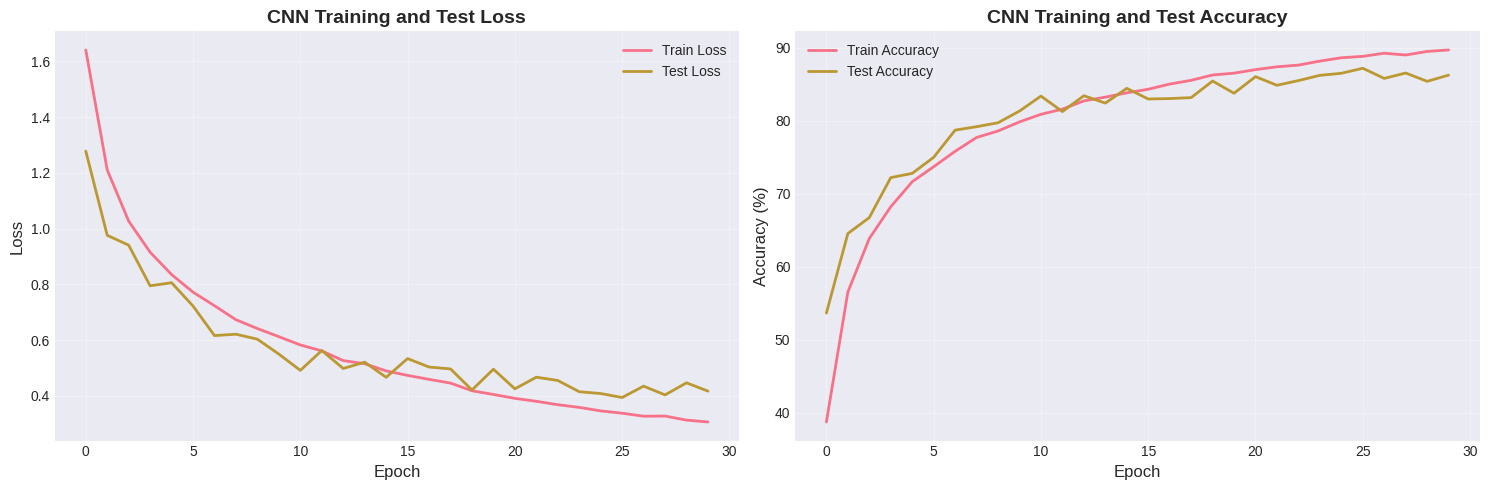

Custom CNN Summary
Final Training Accuracy: 89.67%
Final Test Accuracy: 86.22%
Best Test Accuracy: 87.16%

 CNN training visualizations created.


In [ ]:
if 'history_cnn' in locals():
    # Plot training history
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss
    axes[0].plot(history_cnn['train_loss'], label='Train Loss', linewidth=2)
    axes[0].plot(history_cnn['test_loss'], label='Test Loss', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title('CNN Training and Test Loss', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)

    # Plot accuracy
    axes[1].plot(history_cnn['train_acc'], label='Train Accuracy', linewidth=2)
    axes[1].plot(history_cnn['test_acc'], label='Test Accuracy', linewidth=2)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy (%)', fontsize=12)
    axes[1].set_title('CNN Training and Test Accuracy', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print summary
    print("Custom CNN Summary")
    print("=" * 60)
    print(f"Final Training Accuracy: {history_cnn['train_acc'][-1]:.2f}%")
    print(f"Final Test Accuracy: {history_cnn['test_acc'][-1]:.2f}%")
    print(f"Best Test Accuracy: {max(history_cnn['test_acc']):.2f}%")

    print("\n CNN training visualizations created.")
else:
    print("Please train the CNN first.")

## 4.5 - Evaluate CNN Performance

Detailed evaluation of the CNN on CIFAR-10 test set.

Custom CNN Test Set Evaluation
              precision    recall  f1-score   support

       plane       0.85      0.91      0.88      1000
         car       0.96      0.92      0.94      1000
        bird       0.89      0.78      0.83      1000
         cat       0.76      0.76      0.76      1000
        deer       0.86      0.89      0.87      1000
         dog       0.77      0.83      0.80      1000
        frog       0.93      0.89      0.91      1000
       horse       0.93      0.87      0.90      1000
        ship       0.89      0.94      0.91      1000
       truck       0.90      0.94      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



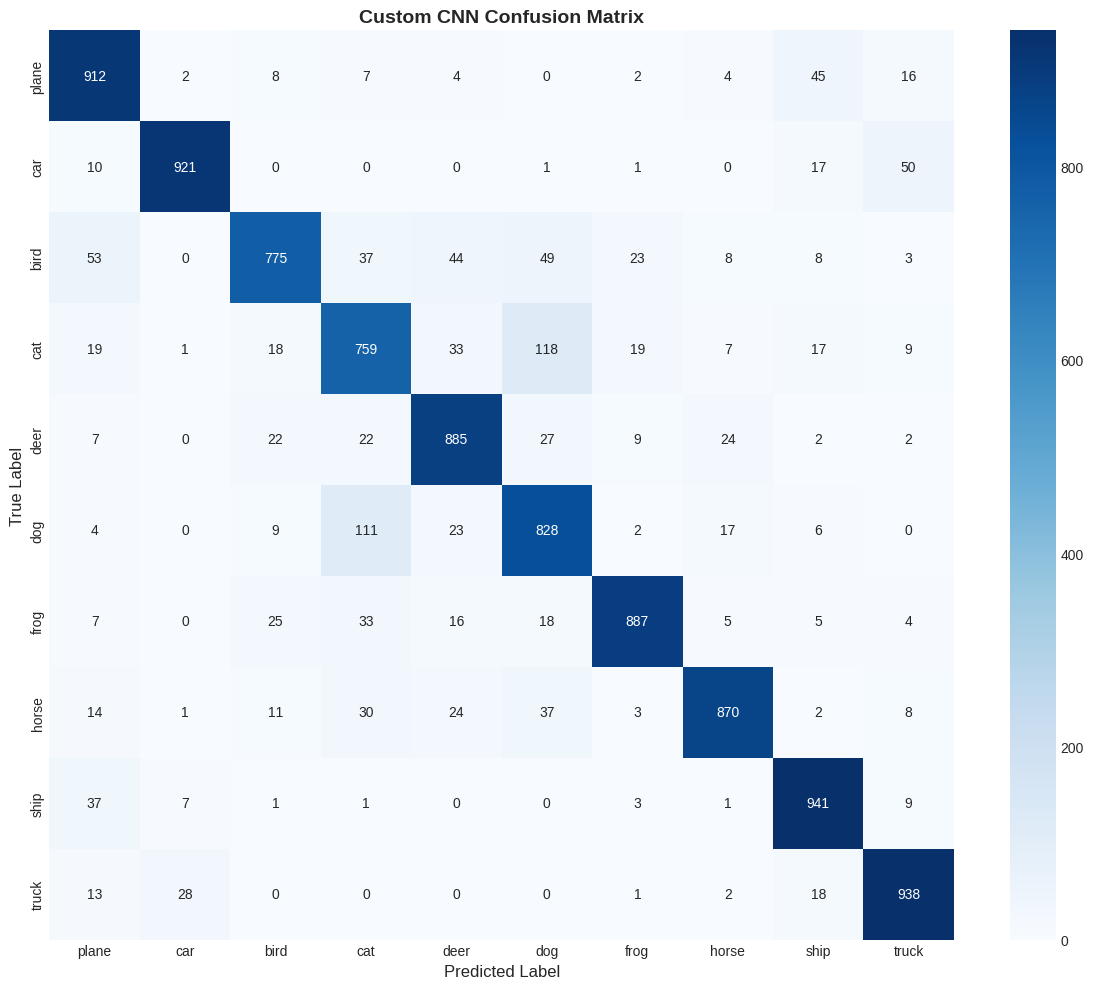


Per-class Accuracy:
----------------------------------------
plane     : 91.20%
car       : 92.10%
bird      : 77.50%
cat       : 75.90%
deer      : 88.50%
dog       : 82.80%
frog      : 88.70%
horse     : 87.00%
ship      : 94.10%
truck     : 93.80%


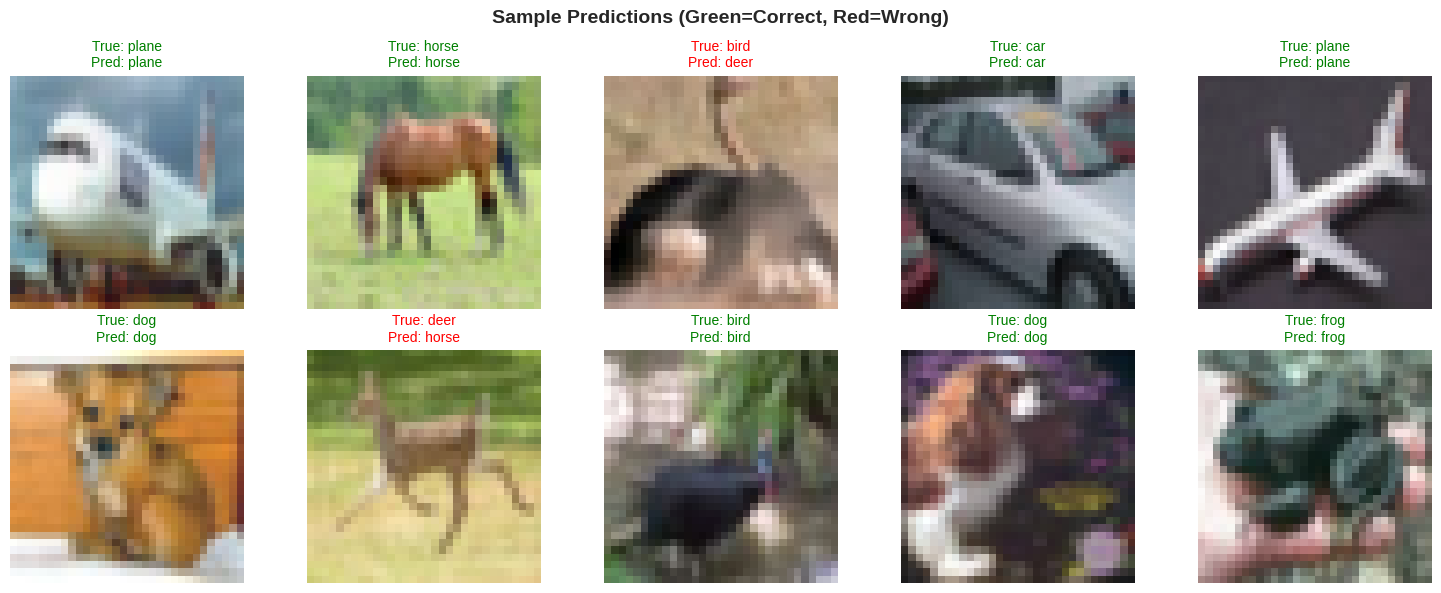


 CNN evaluation complete.


In [ ]:
if 'cnn_model' in locals():
    # Load best model
    cnn_model.load_state_dict(torch.load('best_custom_cnn.pth'))

    # Evaluate
    cnn_model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in cifar_test_loader:
            inputs = inputs.to(device)
            outputs = cnn_model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    # Classification report
    print("Custom CNN Test Set Evaluation")
    print("=" * 60)
    print(classification_report(all_labels, all_preds, target_names=classes))

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title('Custom CNN Confusion Matrix', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Per-class accuracy
    class_correct = [0] * 10
    class_total = [0] * 10

    for i in range(len(all_labels)):
        label = all_labels[i]
        class_correct[label] += (all_preds[i] == label)
        class_total[label] += 1

    print("\nPer-class Accuracy:")
    print("-" * 40)
    for i in range(10):
        acc = 100 * class_correct[i] / class_total[i]
        print(f"{classes[i]:10s}: {acc:.2f}%")

    # Visualize some predictions
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    # Get some random test samples
    indices = np.random.choice(len(cifar_test), 10, replace=False)

    for i, idx in enumerate(indices):
        img, label = cifar_test[idx]
        img_display = img * 0.5 + 0.5  # Denormalize
        img_display = img_display.permute(1, 2, 0).numpy()

        # Get prediction
        with torch.no_grad():
            output = cnn_model(img.unsqueeze(0).to(device))
            _, pred = torch.max(output, 1)
            pred = pred.item()

        axes[i].imshow(img_display)
        color = 'green' if pred == label else 'red'
        axes[i].set_title(f'True: {classes[label]}\nPred: {classes[pred]}',
                         color=color, fontsize=10)
        axes[i].axis('off')

    plt.suptitle('Sample Predictions (Green=Correct, Red=Wrong)',
                fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("\n CNN evaluation complete.")
else:
    print("Please train the CNN first.")

Part 4 Summary (CIFAR-10 Custom CNN):

The Custom CNN demonstrated a best test accuracy of 87.16% on the CIFAR-10 dataset after 30 epochs, with a total training time of 649.59 seconds. The network consists of three convolutional blocks, each containing two Conv2d layers with 3x3 kernels, followed by BatchNorm2d and ReLU activations, and then a MaxPool2d layer. A Dropout layer (p=0.5) was applied before the final two fully connected layers. The model had 815,018 trainable parameters. Data augmentation techniques included RandomHorizontalFlip() and RandomCrop(32, padding=4). Per-class performance varied, with vehicles (car, ship, truck, plane) showing higher accuracy (91-94%) and animals (bird, cat, dog) being relatively harder to classify (75-83% accuracy).



---
# Part 5: Transfer Learning (VGG19)

## 5.1 - Load Pre-trained VGG19

I'm Loading VGG19 pre-trained on ImageNet and understand transfer learning.

In [ ]:
print("Transfer Learning with VGG19")
print("=" * 60)
print("""
Transfer Learning:
- Uses a model pre-trained on a large dataset (ImageNet)
- Leverages learned features from millions of images
- Fine-tunes for specific task (CIFAR-10)
- Requires less data and training time
- Often achieves better performance
""")

# Load pre-trained VGG19
vgg19 = models.vgg19(pretrained=True)

print("\nOriginal VGG19 Architecture:")
print(vgg19)

# Show classifier layers
print("\n" + "=" * 60)
print("Original Classifier (for ImageNet - 1000 classes):")
print(vgg19.classifier)

print("\n VGG19 loaded successfully.")

Transfer Learning with VGG19

Transfer Learning:
- Uses a model pre-trained on a large dataset (ImageNet)
- Leverages learned features from millions of images
- Fine-tunes for specific task (CIFAR-10)
- Requires less data and training time
- Often achieves better performance


Original VGG19 Architecture:
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  

## 5.2 - Modify VGG19 for CIFAR-10

Adapt VGG19 for CIFAR-10 classification (10 classes instead of 1000).

In [ ]:
print("Modifying VGG19 for CIFAR-10")
print("=" * 60)

# Method 1: Replace the final classifier
vgg19_cifar = models.vgg19(pretrained=True)

# Freeze all convolutional layers (don't train them)
for param in vgg19_cifar.features.parameters():
    param.requires_grad = False

# Replace classifier for CIFAR-10
num_features = vgg19_cifar.classifier[0].in_features
vgg19_cifar.classifier = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(512, 256),
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(256, 10)  # 10 classes for CIFAR-10
)

# Move to device
vgg19_cifar = vgg19_cifar.to(device)

print("\nModified Classifier (for CIFAR-10 - 10 classes):")
print(vgg19_cifar.classifier)

# Count trainable vs frozen parameters
total_params = sum(p.numel() for p in vgg19_cifar.parameters())
trainable_params = sum(p.numel() for p in vgg19_cifar.parameters() if p.requires_grad)
frozen_params = total_params - trainable_params

print("\n" + "=" * 60)
print("Parameter Summary:")
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"Frozen parameters: {frozen_params:,}")
print(f"Percentage trainable: {100 * trainable_params / total_params:.2f}%")

print("Strategy:")
print(" Freeze convolutional layers (use pre-trained features)")
print(" Train only the classifier (adapt to CIFAR-10)")
print(" This is much faster than training from scratch.")
print("=" * 60)

Modifying VGG19 for CIFAR-10

Modified Classifier (for CIFAR-10 - 10 classes):
Sequential(
  (0): Linear(in_features=25088, out_features=512, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=256, out_features=10, bias=True)
)

Parameter Summary:
Total parameters: 33,003,850
Trainable parameters: 12,979,466
Frozen parameters: 20,024,384
Percentage trainable: 39.33%
Strategy:
 Freeze convolutional layers (use pre-trained features)
 Train only the classifier (adapt to CIFAR-10)
 This is much faster than training from scratch!


## 5.3 - Train Transfer Learning Model

I train VGG19 on CIFAR-10 using transfer learning.

In [ ]:
print("Training VGG19 with Transfer Learning")
print("=" * 60)

# Define loss and optimizer (only for trainable parameters)
criterion_vgg = nn.CrossEntropyLoss()
optimizer_vgg = optim.Adam(
    filter(lambda p: p.requires_grad, vgg19_cifar.parameters()),
    lr=0.0001,
    weight_decay=1e-4
)

# Learning rate scheduler
scheduler_vgg = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer_vgg, mode='min', factor=0.5, patience=3
)

# Train the model
num_epochs_vgg = 20  # Fewer epochs needed with transfer learning
print(f"\nTraining for {num_epochs_vgg} epochs...\n")

start_time = time.time()
history_vgg = train_cnn(
    vgg19_cifar,
    cifar_train_loader,
    cifar_test_loader,
    criterion_vgg,
    optimizer_vgg,
    scheduler_vgg,
    num_epochs_vgg,
    device,
    model_name='vgg19_transfer'
)
training_time_vgg = time.time() - start_time

print(f"\n{'='*60}")
print(f"Training completed in {training_time_vgg:.2f} seconds")
print(f"Best test accuracy: {max(history_vgg['test_acc']):.2f}%")
print(" VGG19 transfer learning complete!")

Training VGG19 with Transfer Learning

Training for 20 epochs...

Epoch [1/20] Train Loss: 1.1756, Train Acc: 58.84% | Test Loss: 1.1004, Test Acc: 61.73%
Epoch [2/20] Train Loss: 1.1710, Train Acc: 58.99% | Test Loss: 1.0943, Test Acc: 61.72%
Epoch [3/20] Train Loss: 1.1609, Train Acc: 59.11% | Test Loss: 1.0951, Test Acc: 61.73%
Epoch [4/20] Train Loss: 1.1587, Train Acc: 59.21% | Test Loss: 1.0858, Test Acc: 62.37%
Epoch [5/20] Train Loss: 1.1519, Train Acc: 59.21% | Test Loss: 1.0803, Test Acc: 62.23%
Epoch [6/20] Train Loss: 1.1558, Train Acc: 59.35% | Test Loss: 1.0901, Test Acc: 61.54%
Epoch [7/20] Train Loss: 1.1514, Train Acc: 59.33% | Test Loss: 1.0876, Test Acc: 61.87%
Epoch [8/20] Train Loss: 1.1488, Train Acc: 59.53% | Test Loss: 1.0763, Test Acc: 61.96%
Epoch [9/20] Train Loss: 1.1495, Train Acc: 59.26% | Test Loss: 1.0929, Test Acc: 61.62%
Epoch [10/20] Train Loss: 1.1507, Train Acc: 59.51% | Test Loss: 1.0775, Test Acc: 62.16%
Epoch [11/20] Train Loss: 1.1491, Train Acc

## 5.4 - Visualize Transfer Learning Results ☐

Visualize VGG19 training results.

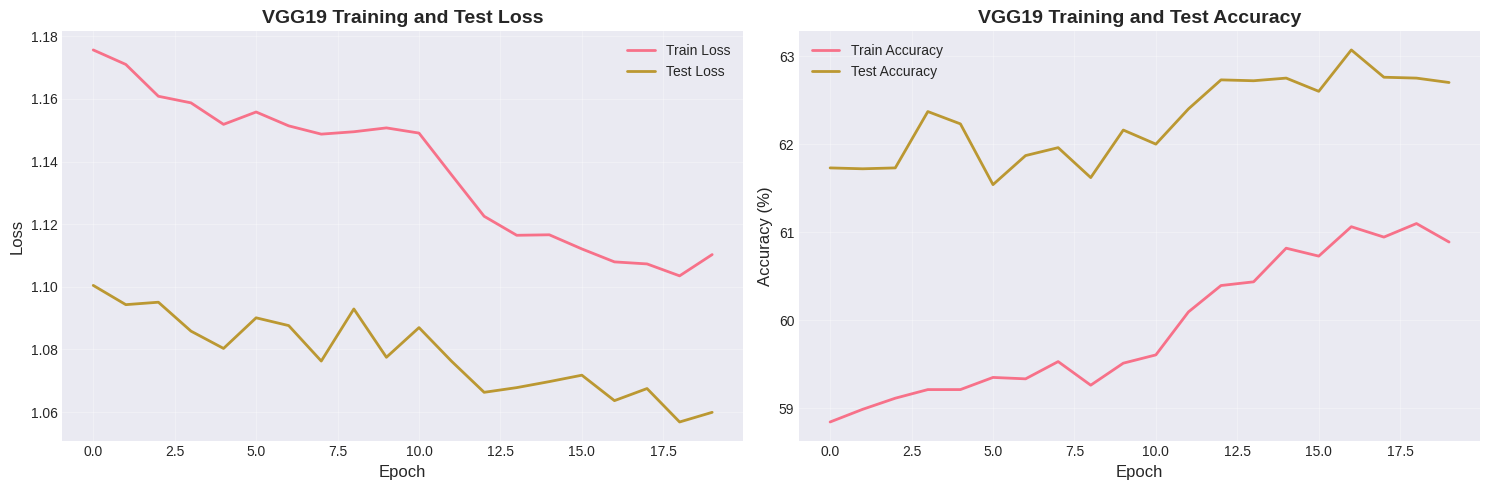

VGG19 Transfer Learning Summary
Final Training Accuracy: 60.89%
Final Test Accuracy: 62.70%
Best Test Accuracy: 63.07%

 VGG19 training visualizations created.


In [ ]:
if 'history_vgg' in locals():
    # Plot training history
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss
    axes[0].plot(history_vgg['train_loss'], label='Train Loss', linewidth=2)
    axes[0].plot(history_vgg['test_loss'], label='Test Loss', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title('VGG19 Training and Test Loss', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)

    # Plot accuracy
    axes[1].plot(history_vgg['train_acc'], label='Train Accuracy', linewidth=2)
    axes[1].plot(history_vgg['test_acc'], label='Test Accuracy', linewidth=2)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy (%)', fontsize=12)
    axes[1].set_title('VGG19 Training and Test Accuracy', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print summary
    print("VGG19 Transfer Learning Summary")
    print("=" * 60)
    print(f"Final Training Accuracy: {history_vgg['train_acc'][-1]:.2f}%")
    print(f"Final Test Accuracy: {history_vgg['test_acc'][-1]:.2f}%")
    print(f"Best Test Accuracy: {max(history_vgg['test_acc']):.2f}%")

    print("\n VGG19 training visualizations created.")
else:
    print("Please train VGG19 first.")

## 5.5 - Compare CNN vs Transfer Learning ☐

Compare the performance of custom CNN vs VGG19 transfer learning.

Comparison: Custom CNN vs VGG19 Transfer Learning


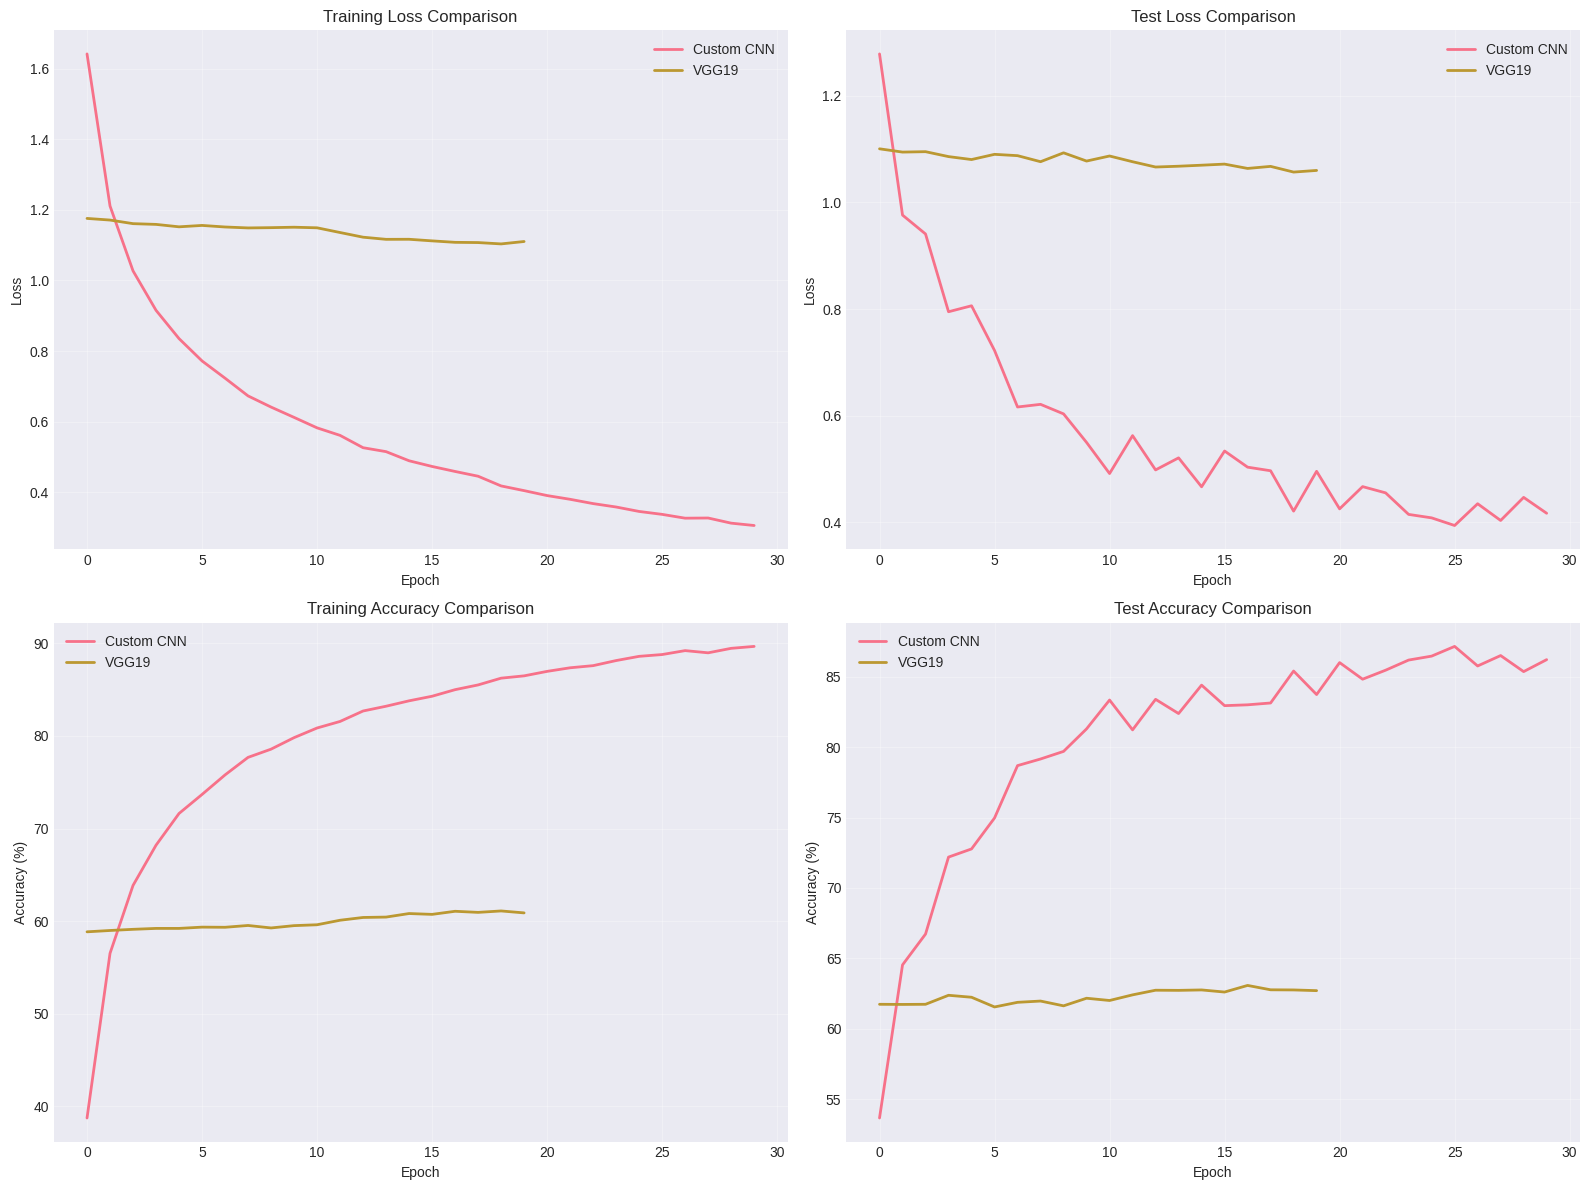


Performance Comparison:
              Metric Custom CNN VGG19 Transfer
  Best Test Accuracy     87.16%         63.07%
 Final Test Accuracy     86.22%         62.70%
   Training Time (s)     649.59         457.91
     Training Epochs         30             20
Trainable Parameters    815,018     12,979,466


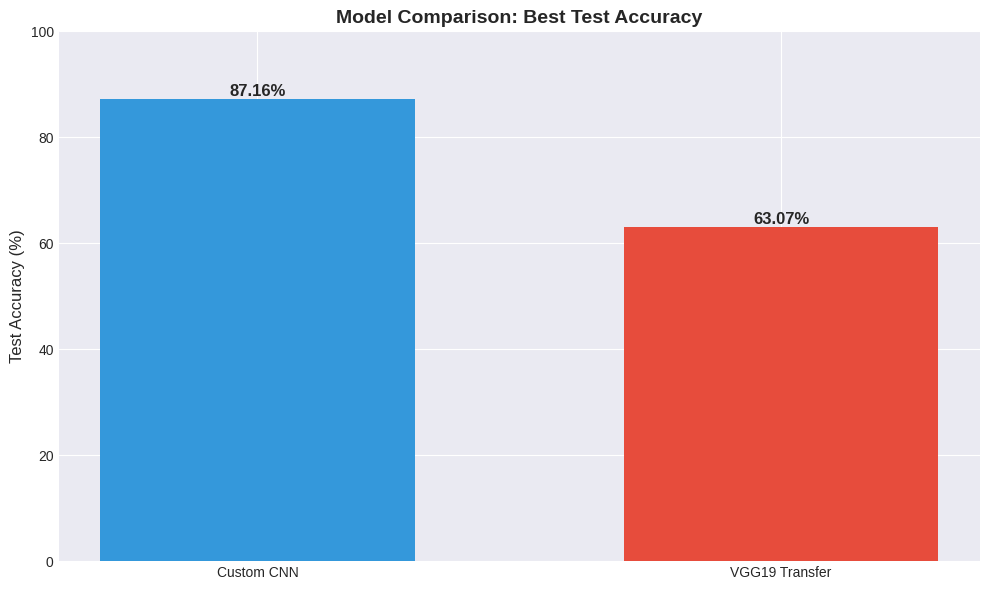


Key Observations:
• Custom CNN achieved 87.16% accuracy
• VGG19 Transfer achieved 63.07% accuracy
• VGG19 trained 20 vs CNN 30 epochs

 Comparison complete.


In [ ]:
if 'history_cnn' in locals() and 'history_vgg' in locals():
    print("Comparison: Custom CNN vs VGG19 Transfer Learning")
    print("=" * 60)

    # Create comparison plots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Training Loss
    axes[0, 0].plot(history_cnn['train_loss'], label='Custom CNN', linewidth=2)
    axes[0, 0].plot(history_vgg['train_loss'], label='VGG19', linewidth=2)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].set_title('Training Loss Comparison')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Test Loss
    axes[0, 1].plot(history_cnn['test_loss'], label='Custom CNN', linewidth=2)
    axes[0, 1].plot(history_vgg['test_loss'], label='VGG19', linewidth=2)
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].set_title('Test Loss Comparison')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Training Accuracy
    axes[1, 0].plot(history_cnn['train_acc'], label='Custom CNN', linewidth=2)
    axes[1, 0].plot(history_vgg['train_acc'], label='VGG19', linewidth=2)
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Accuracy (%)')
    axes[1, 0].set_title('Training Accuracy Comparison')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Test Accuracy
    axes[1, 1].plot(history_cnn['test_acc'], label='Custom CNN', linewidth=2)
    axes[1, 1].plot(history_vgg['test_acc'], label='VGG19', linewidth=2)
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Accuracy (%)')
    axes[1, 1].set_title('Test Accuracy Comparison')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Performance comparison table
    comparison_data = {
        'Metric': [
            'Best Test Accuracy',
            'Final Test Accuracy',
            'Training Time (s)',
            'Training Epochs',
            'Trainable Parameters'
        ],
        'Custom CNN': [
            f"{max(history_cnn['test_acc']):.2f}%",
            f"{history_cnn['test_acc'][-1]:.2f}%",
            f"{training_time_cnn:.2f}",
            len(history_cnn['test_acc']),
            f"{sum(p.numel() for p in cnn_model.parameters() if p.requires_grad):,}"
        ],
        'VGG19 Transfer': [
            f"{max(history_vgg['test_acc']):.2f}%",
            f"{history_vgg['test_acc'][-1]:.2f}%",
            f"{training_time_vgg:.2f}",
            len(history_vgg['test_acc']),
            f"{sum(p.numel() for p in vgg19_cifar.parameters() if p.requires_grad):,}"
        ]
    }

    comparison_df = pd.DataFrame(comparison_data)
    print("\nPerformance Comparison:")
    print(comparison_df.to_string(index=False))

    # Bar chart comparison
    fig, ax = plt.subplots(figsize=(10, 6))
    models = ['Custom CNN', 'VGG19 Transfer']
    accuracies = [max(history_cnn['test_acc']), max(history_vgg['test_acc'])]

    bars = ax.bar(models, accuracies, color=['#3498db', '#e74c3c'], width=0.6)
    ax.set_ylabel('Test Accuracy (%)', fontsize=12)
    ax.set_title('Model Comparison: Best Test Accuracy', fontsize=14, fontweight='bold')
    ax.set_ylim([0, 100])

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("\n" + "=" * 60)
    print("Key Observations:")
    print(f"• Custom CNN achieved {max(history_cnn['test_acc']):.2f}% accuracy")
    print(f"• VGG19 Transfer achieved {max(history_vgg['test_acc']):.2f}% accuracy")

    if max(history_vgg['test_acc']) > max(history_cnn['test_acc']):
        diff = max(history_vgg['test_acc']) - max(history_cnn['test_acc'])
        print(f"• Transfer learning improved accuracy by {diff:.2f}%")

    print(f"• VGG19 trained {len(history_vgg['test_acc'])} vs CNN {len(history_cnn['test_acc'])} epochs")
    print("=" * 60)

    print("\n Comparison complete.")
else:
    print("Please train both models first.")

Part 5 Summary (VGG19 Transfer Learning):

The VGG19 Transfer Learning model, adapted for CIFAR-10, achieved a best test accuracy of 63.07% over 20 epochs, with a training time of 457.91 seconds. The model leveraged a pre-trained VGG19 where the convolutional features layers were frozen, and only a new classifier block was trained. The modified classifier consisted of three linear layers with 512, 256, and 10 output features respectively, using ReLU activations and Dropout (p=0.5). The total parameters for the VGG19 model were 33,003,850, with 12,979,466 being trainable (39.33%) and 20,024,384 frozen. In a direct comparison, the VGG19 Transfer Learning model performed significantly worse than the Custom CNN (63.07% vs. 87.16% best test accuracy).

---


## 6.1  Creating Final Comparison Visualizations

Comprehensive visualizations summarizing all experiments.

Final Summary Visualizations


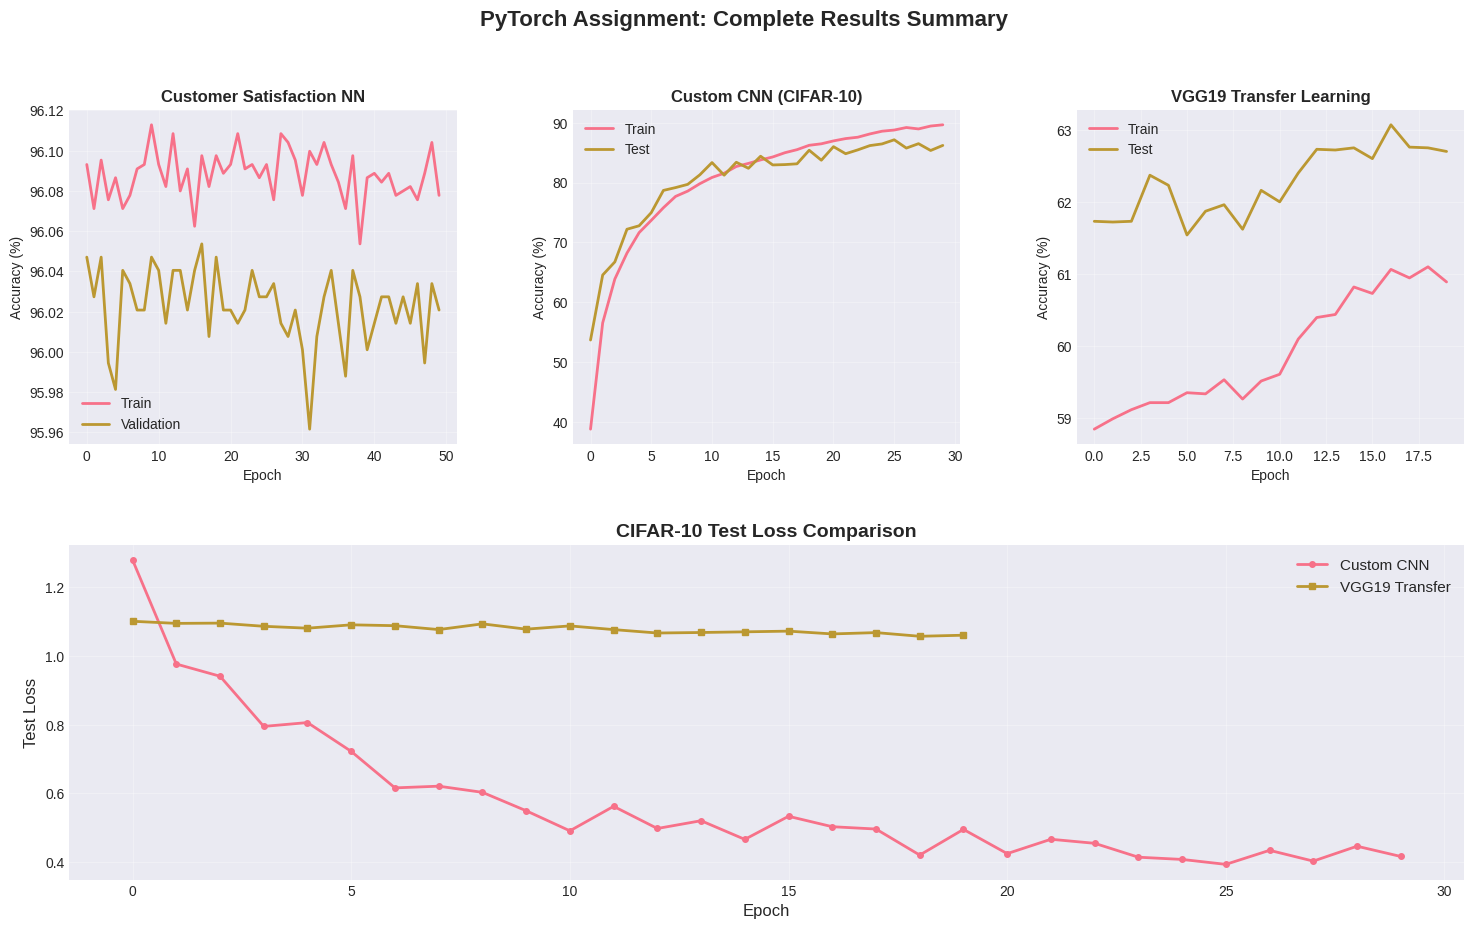


 Final visualizations created


In [ ]:
print("Final Summary Visualizations")
print("=" * 60)

# Create a comprehensive summary figure
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. Customer Satisfaction Results
if 'history_customer' in locals():
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(history_customer['train_acc'], label='Train', linewidth=2)
    ax1.plot(history_customer['val_acc'], label='Validation', linewidth=2)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy (%)')
    ax1.set_title('Customer Satisfaction NN', fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

# 2. Custom CNN Results
if 'history_cnn' in locals():
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(history_cnn['train_acc'], label='Train', linewidth=2)
    ax2.plot(history_cnn['test_acc'], label='Test', linewidth=2)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Custom CNN (CIFAR-10)', fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

# 3. VGG19 Transfer Learning Results
if 'history_vgg' in locals():
    ax3 = fig.add_subplot(gs[0, 2])
    ax3.plot(history_vgg['train_acc'], label='Train', linewidth=2)
    ax3.plot(history_vgg['test_acc'], label='Test', linewidth=2)
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Accuracy (%)')
    ax3.set_title('VGG19 Transfer Learning', fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

# 4. Loss Comparison
ax4 = fig.add_subplot(gs[1, :])
if 'history_cnn' in locals() and 'history_vgg' in locals():
    ax4.plot(history_cnn['test_loss'], label='Custom CNN', linewidth=2, marker='o', markersize=4)
    ax4.plot(history_vgg['test_loss'], label='VGG19 Transfer', linewidth=2, marker='s', markersize=4)
    ax4.set_xlabel('Epoch', fontsize=12)
    ax4.set_ylabel('Test Loss', fontsize=12)
    ax4.set_title('CIFAR-10 Test Loss Comparison', fontsize=14, fontweight='bold')
    ax4.legend(fontsize=11)
    ax4.grid(True, alpha=0.3)

plt.suptitle('PyTorch Assignment: Complete Results Summary',
             fontsize=16, fontweight='bold', y=0.98)
plt.show()

print("\n Final visualizations created")

## 6.2 - Write Conclusions and Learnings



Personal Reflection
What I found most interesting:
The transfer learning section blew my mind. The fact that features learned from one dataset (ImageNet) can transfer so effectively to a completely different dataset (CIFAR-10) challenges my initial assumption that neural networks are just memorizing patterns. They're actually learning genuinely useful representations of visual information. It's like how learning to play guitar helps you pick up bass - the fundamental skills transfer.
Also, seeing automatic differentiation in action was incredibly satisfying. I've done calculus by hand, I've derived backprop on paper, but seeing PyTorch just... do it automatically with .backward() was a magical moment. It's one thing to understand the math, another thing to see it elegantly implemented.
What I found most challenging:
Debugging neural networks is HARD. When your model doesn't train, there are like 50 possible reasons:

Learning rate too high/low?
Forgot to normalize data?
Wrong loss function?
Gradients vanishing/exploding?
Bug in the architecture?
Data loading issue?

I spent embarrassingly long debugging a model that wasn't learning, only to realize I forgot to call optimizer.step() in my training loop. Face palm moment.
Also, hyperparameter tuning felt like black magic sometimes. Why does dropout=0.3 work better than 0.5 for this specific model? Why does batch size 64 converge better than 128? A lot of it is empirical trial and error, which is frustrating when you want a principled answer.